In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import timm

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = 512
num_workers = 8

model_name = 'vit_base_patch16_224'
pretrained = True
num_classes = 10

device_gpu = 'cuda:3'

label_smoothing = 0.2
learning_rate = 0.001
epochs = 30

model_path = 'best_model2.pth'  # 모델 저장 경로

In [3]:
# 데이터 증강을 위한 전처리
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),  # 무작위 크기 및 비율로 자르기
    transforms.RandomHorizontalFlip(),  # 50% 확률로 수평 뒤집기
    transforms.RandomRotation(15),      # -15도에서 15도 사이로 무작위 회전
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 색상 변경
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
len(trainloader), len(testloader)

(98, 20)

In [5]:
model = timm.create_model(model_name=model_name, 
                          pretrained=pretrained, 
                          num_classes=num_classes)

device = torch.device(device_gpu if torch.cuda.is_available() else "cpu")
model.to(device)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [22]:
# criterion1 = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
criterion2 = nn.CrossEntropyLoss(label_smoothing=0.0)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer, max_lr=learning_rate*2, total_steps=epochs*len(trainloader))

In [23]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

Epoch 1: 100%|██████████| 98/98 [05:30<00:00,  3.38s/it]


Epoch 1, Loss: 2.4747735322738182, Val Loss: 1.9698083698749542, LR: 0.001, LS: 0.0, Duration: 355.80 sec - model saved!


Epoch 2: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 2, Loss: 1.9530869454753643, Val Loss: 1.7744612395763397, LR: 0.001, LS: 0.006896551724137931, Duration: 357.90 sec - model saved!


Epoch 3: 100%|██████████| 98/98 [05:34<00:00,  3.41s/it]


Epoch 3, Loss: 1.8188299634018723, Val Loss: 1.536428266763687, LR: 0.001, LS: 0.013793103448275862, Duration: 359.39 sec - model saved!


Epoch 4: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 4, Loss: 1.735155247912115, Val Loss: 1.4374862432479858, LR: 0.001, LS: 0.020689655172413793, Duration: 358.02 sec - model saved!


Epoch 5: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 5, Loss: 1.6903232007610554, Val Loss: 1.440690928697586, LR: 0.001, LS: 0.027586206896551724, Duration: 357.35 sec


Epoch 6: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 6, Loss: 1.65406577319515, Val Loss: 1.4129231810569762, LR: 0.001, LS: 0.03448275862068966, Duration: 357.27 sec - model saved!


Epoch 7: 100%|██████████| 98/98 [05:33<00:00,  3.41s/it]


Epoch 7, Loss: 1.6370433751417666, Val Loss: 1.31312438249588, LR: 0.001, LS: 0.041379310344827586, Duration: 358.77 sec - model saved!


Epoch 8: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 8, Loss: 1.6291032883585717, Val Loss: 1.3252815544605254, LR: 0.001, LS: 0.048275862068965524, Duration: 357.44 sec


Epoch 9: 100%|██████████| 98/98 [05:31<00:00,  3.38s/it]


Epoch 9, Loss: 1.609363124078634, Val Loss: 1.3031003713607787, LR: 0.001, LS: 0.05517241379310345, Duration: 356.34 sec - model saved!


Epoch 10: 100%|██████████| 98/98 [05:32<00:00,  3.40s/it]


Epoch 10, Loss: 1.5900939946271935, Val Loss: 1.221076625585556, LR: 0.001, LS: 0.062068965517241385, Duration: 357.67 sec - model saved!


Epoch 11: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 11, Loss: 1.588812485033152, Val Loss: 1.2491565883159637, LR: 0.001, LS: 0.06896551724137932, Duration: 356.62 sec


Epoch 12: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 12, Loss: 1.5794227938262784, Val Loss: 1.2386690437793733, LR: 0.001, LS: 0.07586206896551724, Duration: 357.87 sec


Epoch 13: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 13, Loss: 1.5759242481114912, Val Loss: 1.2135599970817565, LR: 0.001, LS: 0.08275862068965517, Duration: 357.26 sec - model saved!


Epoch 14: 100%|██████████| 98/98 [05:31<00:00,  3.38s/it]


Epoch 14, Loss: 1.5763252839750173, Val Loss: 1.2096736907958985, LR: 0.001, LS: 0.08965517241379312, Duration: 356.32 sec - model saved!


Epoch 15: 100%|██████████| 98/98 [05:30<00:00,  3.38s/it]


Epoch 15, Loss: 1.5796607428667497, Val Loss: 1.235216623544693, LR: 0.001, LS: 0.09655172413793105, Duration: 354.97 sec


Epoch 16: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 16, Loss: 1.5774026902354494, Val Loss: 1.1661844193935393, LR: 0.001, LS: 0.10344827586206898, Duration: 357.19 sec - model saved!


Epoch 17: 100%|██████████| 98/98 [05:31<00:00,  3.38s/it]


Epoch 17, Loss: 1.5734639873310012, Val Loss: 1.1844173669815063, LR: 0.001, LS: 0.1103448275862069, Duration: 355.21 sec


Epoch 18: 100%|██████████| 98/98 [05:32<00:00,  3.40s/it]


Epoch 18, Loss: 1.5889204339105256, Val Loss: 1.1929920494556427, LR: 0.001, LS: 0.11724137931034483, Duration: 357.09 sec


Epoch 19: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 19, Loss: 1.5777421362546025, Val Loss: 1.1100456655025481, LR: 0.001, LS: 0.12413793103448277, Duration: 356.85 sec - model saved!


Epoch 20: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 20, Loss: 1.570269605334924, Val Loss: 1.148056536912918, LR: 0.001, LS: 0.1310344827586207, Duration: 356.18 sec


Epoch 21: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 21, Loss: 1.5696042277375046, Val Loss: 1.08680060505867, LR: 0.001, LS: 0.13793103448275865, Duration: 358.54 sec - model saved!


Epoch 22: 100%|██████████| 98/98 [05:32<00:00,  3.40s/it]


Epoch 22, Loss: 1.5752009895383094, Val Loss: 1.0998287320137023, LR: 0.001, LS: 0.14482758620689656, Duration: 357.08 sec


Epoch 23: 100%|██████████| 98/98 [05:35<00:00,  3.42s/it]


Epoch 23, Loss: 1.5679118061552242, Val Loss: 1.0961872816085816, LR: 0.001, LS: 0.15172413793103448, Duration: 359.98 sec


Epoch 24: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 24, Loss: 1.5698546244173635, Val Loss: 1.0762250542640686, LR: 0.001, LS: 0.15862068965517243, Duration: 357.17 sec - model saved!


Epoch 25: 100%|██████████| 98/98 [05:33<00:00,  3.40s/it]


Epoch 25, Loss: 1.57443790776389, Val Loss: 1.0645655989646912, LR: 0.001, LS: 0.16551724137931034, Duration: 358.23 sec - model saved!


Epoch 26: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 26, Loss: 1.579599769747987, Val Loss: 1.0527658343315125, LR: 0.001, LS: 0.1724137931034483, Duration: 357.15 sec - model saved!


Epoch 27: 100%|██████████| 98/98 [05:31<00:00,  3.39s/it]


Epoch 27, Loss: 1.5779044506501179, Val Loss: 1.0236900687217712, LR: 0.001, LS: 0.17931034482758623, Duration: 356.60 sec - model saved!


Epoch 28: 100%|██████████| 98/98 [05:31<00:00,  3.39s/it]


Epoch 28, Loss: 1.5870156032698495, Val Loss: 1.0310524702072144, LR: 0.001, LS: 0.18620689655172415, Duration: 356.01 sec


Epoch 29: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 29, Loss: 1.5875709202824806, Val Loss: 1.0560987710952758, LR: 0.001, LS: 0.1931034482758621, Duration: 356.67 sec


Epoch 30: 100%|██████████| 98/98 [05:32<00:00,  3.39s/it]


Epoch 30, Loss: 1.589061824642882, Val Loss: 0.9881997674703598, LR: 0.001, LS: 0.2, Duration: 357.35 sec - model saved!


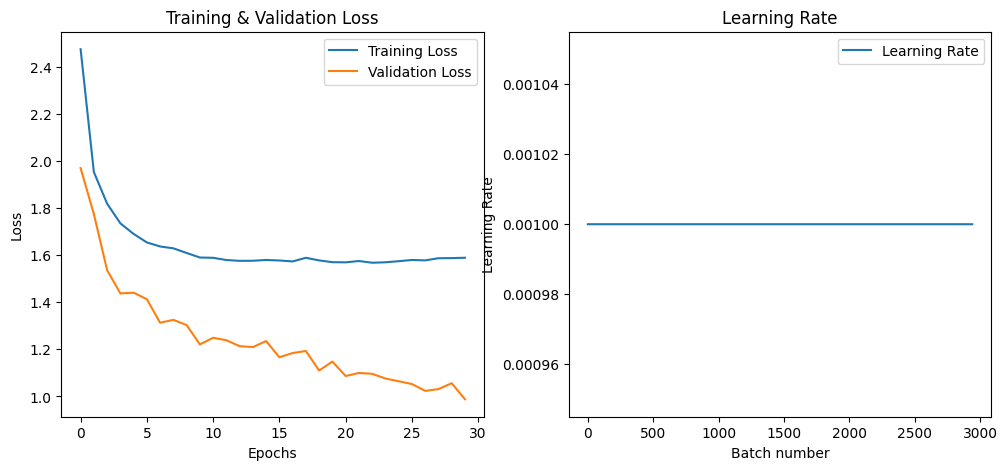

In [24]:
from tqdm import tqdm

training_time = 0
early_stopping = EarlyStopping(patience=5)
losses = []
val_losses = []
lrs = []
best_val_loss = float('inf')

model_save = False

for epoch in range(epochs):
    model.train()
    start_time = time.time()
    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader), total=len(trainloader), desc=f"Epoch {epoch + 1}")
    smoothing_ratio = label_smoothing * (epoch/(epochs-1))
    criterion1 = nn.CrossEntropyLoss(label_smoothing=smoothing_ratio) # 처음에는 ls없다가 서서히 증가시켜보기
    for i, data in pbar:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion1(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
        lr = optimizer.param_groups[0]["lr"]
        lrs.append(lr)
    epoch_loss = running_loss / len(trainloader)
    losses.append(epoch_loss)

    # 검증 손실 계산
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion2(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    # 모델 저장
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        model_save = True
        torch.save(model.state_dict(), model_path)

    epoch_duration = time.time() - start_time
    training_time += epoch_duration
    if model_save:
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss}, Val Loss: {val_loss}, LR: {lr}, LS: {smoothing_ratio}, Duration: {epoch_duration:.2f} sec - model saved!')
        model_save = False
    else :
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss}, Val Loss: {val_loss}, LR: {lr}, LS: {smoothing_ratio}, Duration: {epoch_duration:.2f} sec')

    # Early Stopping 체크
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# 학습 및 검증 손실 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lrs, label='Learning Rate')
plt.title('Learning Rate')
plt.xlabel('Batch number')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


In [7]:
model_path, device_gpu

('best_model2.pth', 'cuda:3')

In [13]:
vit = torch.load(model_path, map_location=device_gpu)

In [19]:
vit.keys()

odict_keys(['cls_token', 'pos_embed', 'patch_embed.proj.weight', 'patch_embed.proj.bias', 'blocks.0.norm1.weight', 'blocks.0.norm1.bias', 'blocks.0.attn.qkv.weight', 'blocks.0.attn.qkv.bias', 'blocks.0.attn.proj.weight', 'blocks.0.attn.proj.bias', 'blocks.0.norm2.weight', 'blocks.0.norm2.bias', 'blocks.0.mlp.fc1.weight', 'blocks.0.mlp.fc1.bias', 'blocks.0.mlp.fc2.weight', 'blocks.0.mlp.fc2.bias', 'blocks.1.norm1.weight', 'blocks.1.norm1.bias', 'blocks.1.attn.qkv.weight', 'blocks.1.attn.qkv.bias', 'blocks.1.attn.proj.weight', 'blocks.1.attn.proj.bias', 'blocks.1.norm2.weight', 'blocks.1.norm2.bias', 'blocks.1.mlp.fc1.weight', 'blocks.1.mlp.fc1.bias', 'blocks.1.mlp.fc2.weight', 'blocks.1.mlp.fc2.bias', 'blocks.2.norm1.weight', 'blocks.2.norm1.bias', 'blocks.2.attn.qkv.weight', 'blocks.2.attn.qkv.bias', 'blocks.2.attn.proj.weight', 'blocks.2.attn.proj.bias', 'blocks.2.norm2.weight', 'blocks.2.norm2.bias', 'blocks.2.mlp.fc1.weight', 'blocks.2.mlp.fc1.bias', 'blocks.2.mlp.fc2.weight', 'bloc

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Hook 함수 정의 및 등록
attention_maps = []
def get_attention_map(module, input, output):
    global attention_maps
    attention_maps.append(output[1].detach())
hook = vit.transformer_encoders[0].attn.register_forward_hook(get_attention_map)

# 모델을 통한 예측 및 Attention Map 추출
original_images, labels = next(iter(testloader))
outputs = vit(original_images.to(device))
_, predicted = torch.max(outputs, 1)
hook.remove()

# CIFAR-10 클래스 레이블
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Attention Map 가공 및 시각화 개선 함수
def show_attention_on_image(img, attention_map, label, pred, threshold=0.0):
    # 이미지 크기에 맞게 Attention Map 조정
    attention_map = attention_map.cpu().numpy()
    attention_map = attention_map - np.min(attention_map)
    attention_map = attention_map / np.max(attention_map)

    # 임계값 이하의 Attention 값 제거
    # attention_map[attention_map < threshold] = 0

    # 원본 이미지 크기로 Attention Map 업샘플링
    attention_map_resized = np.resize(attention_map, (img.shape[1], img.shape[2]))

    # 원본 이미지와 Attention Map 겹쳐서 표시
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img.permute(1, 2, 0))
    axs[0].axis('off')
    axs[0].set_title(f'Original Image\nTrue Label: {label}')

    axs[1].imshow(img.permute(1, 2, 0))
    axs[1].imshow(attention_map_resized, cmap='jet', alpha=0.6)  # 투명도 조절
    axs[1].axis('off')
    axs[1].set_title(f'Image with Attention Map\nPredicted: {pred}')

    plt.show()

# 각 이미지에 대해 시각화 수행
for i in range(4):
    show_attention_on_image(original_images[i], attention_maps[0][i], classes[labels[i]], classes[predicted[i]])


AttributeError: 'collections.OrderedDict' object has no attribute 'transformer_encoders'